# Assignment 1

First we need to import a few modules, execute the cell below:

In [96]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline



Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [97]:
def f(x):
    return numpy.cos(x) 
    

    '''Function equivalent to cos(x), should work for one argument or a numpy array'''


You can use the following cell to check that your code works for scalar arguments:

In [98]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [99]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [100]:
def df_analytic(x):
    return (-1)*numpy.sin(x)



In [101]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [102]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [103]:
def backward_difference(f, x, dx):
    '''
    This function implements the backward difference method for the 
    first derivative of the function f at position x using interval
    dx.
    '''
    return  (f(x)-f(x-dx))/dx

In [104]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


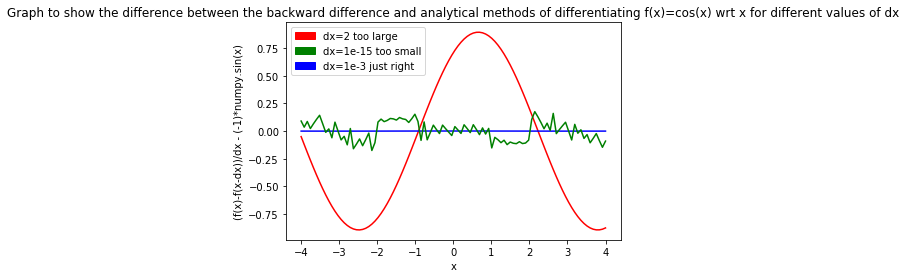

<Figure size 3600x3600 with 0 Axes>

'df_analytic and backward_difference'

In [111]:
import matplotlib.patches as mpatches
xs = numpy.linspace(-4,4,100)
"define functions"
l= df_dx_1 = backward_difference(f, xs, dx=2) 
m= df_dx_2 = backward_difference(f, xs, dx=1e-3)
n= df_dx_3 = backward_difference(f, xs, dx=1e-15)
o= df_dx_analytical = df_analytic(xs)
"Plotting what and how"
plt.plot(xs, l-o , 'r')
plt.plot(xs, m-o , 'b')
plt.plot(xs, n-o , 'g')

"labelling"
plt.title("Graph to show the difference between the backward difference and analytical methods of differentiating f(x)=cos(x) wrt x for different values of dx")
plt.xlabel("x")
plt.ylabel("(f(x)-f(x-dx))/dx - (-1)*numpy.sin(x)")
over = mpatches.Patch(color='red', label='dx=2 too large')
sweet = mpatches.Patch(color='blue', label='dx=1e-3 just right')
under = mpatches.Patch(color='green', label='dx=1e-15 too small')
plt.legend(handles=[over, under, sweet])


plt.figure(figsize=(50, 50))
plt.show()

"df_analytic and backward_difference"

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


Where dx is too large, accuracy is lost due to taking a large step away from the point we are working out the gradient at. This means f(x) is not close to f(x-dx) so we are no longer dealing with small increments which would give us the value of the differential at that x, for all x of the function. 

Where dx is too small, this is due to the precision of python. At dx=1e-15, we start to notice erratic behaviour of the difference plotted, and for smaller values of dx such as dx=1e-100, we notice a very large difference to grow. This would be down to the limitations of python, as by the limit of backward difference as dx tends to zero, this value and the analytic value should be the same. However, we don't see this. As the values of f(x) and 